In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('mushrooms.csv')
len(df.columns)

23

In [2]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df['habitat'].value_counts()

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df.columns:
    df[i] = le.fit_transform(df[i])
    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [6]:
#Splitting the data into training and test test
X = df.iloc[:, 1:22].values
y = df.iloc[:,0].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=0) 

In [7]:
X

array([[5, 2, 4, ..., 4, 2, 3],
       [5, 2, 9, ..., 4, 3, 2],
       [0, 2, 8, ..., 4, 3, 2],
       ...,
       [2, 2, 4, ..., 4, 0, 1],
       [3, 3, 4, ..., 0, 7, 4],
       [5, 2, 4, ..., 4, 4, 1]])

In [8]:
y1

array([1, 0, 0, ..., 0, 1, 0])

In [17]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(21,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                220       
                                                                 
 dense_21 (Dense)            (None, 8)                 88        
                                                                 
 dense_22 (Dense)            (None, 6)                 54        
                                                                 
 dense_23 (Dense)            (None, 2)                 14        
                                                                 
Total params: 376
Trainable params: 376
Non-trainable params: 0
_________________________________________________________________


In [14]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=4, validation_data= (X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
1625/1625 [==============================] - 1s 735us/step - loss: 0.2983 - accuracy: 0.8968 - val_loss: 0.3076 - val_accuracy: 0.8775
Epoch 2/100
1625/1625 [==============================] - 1s 667us/step - loss: 0.2266 - accuracy: 0.9365 - val_loss: 0.1595 - val_accuracy: 0.9557
Epoch 3/100
1625/1625 [==============================] - 1s 666us/step - loss: 0.2420 - accuracy: 0.9291 - val_loss: 0.2285 - val_accuracy: 0.9391
Epoch 4/100
1625/1625 [==============================] - 1s 675us/step - loss: 0.2444 - accuracy: 0.9178 - val_loss: 0.1667 - val_accuracy: 0.9606
Epoch 5/100
1625/1625 [==============================] - 1s 669us/step - loss: 0.2250 - accuracy: 0.9345 - val_loss: 0.1694 - val_accuracy: 0.9606
Epoch 6/100
1625/1625 [==============================] - 1s 666us/step - loss: 0.2620 - accuracy: 0.9172 - val_loss: 0.1534 - val_accuracy: 0.9637
Epoch 7/100
1625/1625 [==============================] - 1s 681us/step - loss: 0.2222 - accuracy: 0.9406 - val_loss: 0

1625/1625 [==============================] - 1s 668us/step - loss: 0.6976 - accuracy: 0.5005 - val_loss: 0.7259 - val_accuracy: 0.4757
Epoch 57/100
1625/1625 [==============================] - 1s 667us/step - loss: 0.6973 - accuracy: 0.5038 - val_loss: 0.6946 - val_accuracy: 0.5243
Epoch 58/100
1625/1625 [==============================] - 1s 665us/step - loss: 0.6962 - accuracy: 0.5162 - val_loss: 0.6968 - val_accuracy: 0.4757
Epoch 59/100
1625/1625 [==============================] - 1s 667us/step - loss: 0.6988 - accuracy: 0.4924 - val_loss: 0.7076 - val_accuracy: 0.5243
Epoch 60/100
1625/1625 [==============================] - 1s 667us/step - loss: 0.6991 - accuracy: 0.4942 - val_loss: 0.6924 - val_accuracy: 0.5243
Epoch 61/100
1625/1625 [==============================] - 1s 676us/step - loss: 0.6959 - accuracy: 0.5098 - val_loss: 0.6943 - val_accuracy: 0.4757
Epoch 62/100
1625/1625 [==============================] - 1s 668us/step - loss: 0.6970 - accuracy: 0.5084 - val_loss: 0.6935 

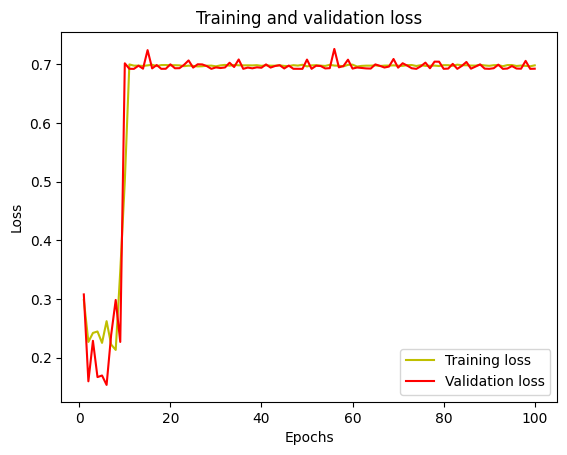

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.52      1.00      0.69       852
           1       0.00      0.00      0.00       773

    accuracy                           0.52      1625
   macro avg       0.26      0.50      0.34      1625
weighted avg       0.27      0.52      0.36      1625

[[852   0]
 [773   0]]


/Users/yes/opt/anaconda3/envs/aiclass/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yes/opt/anaconda3/envs/aiclass/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yes/opt/anaconda3/envs/aiclass/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,